### Workbook for NLP (BOW in particular) exercises

In [1]:
import nltk

In [2]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> list
Command 'list' unrecognized

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parse

Downloader> q


In [3]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [4]:
print(len(messages))

5574


In [7]:
type(messages)

list

In [8]:
for mess_no, message in enumerate(messages[:10]):
    print(mess_no,message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [9]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [10]:
import pandas as pd

In [11]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names=['label','messages'])

In [12]:
messages.head()

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
messages.describe()

,label,messages
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [15]:
messages.groupby('label').describe()

messages                                                               
         count unique                                                top freq
label                                                                        
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

Feature engineering!!!!

In [16]:
messages['length']= messages['messages'].apply(len)

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

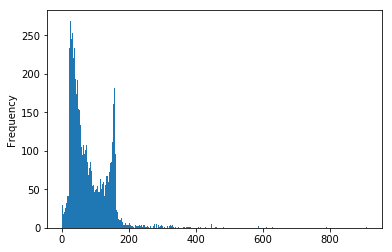

In [18]:
messages['length'].plot.hist(bins=300)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E19E470>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000EAA75C0>], dtype=object)

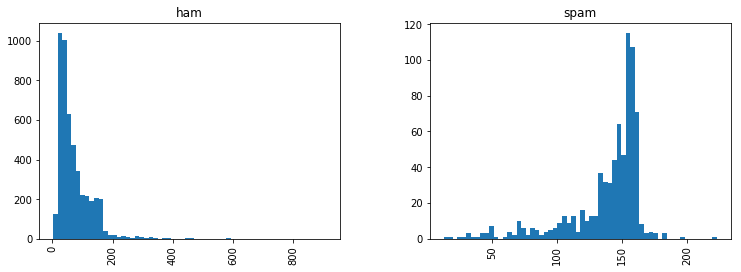

In [19]:
messages.hist(column='length', by='label',bins=60,figsize=(12,4))

In [20]:
import string


In [21]:
mess = 'smaple message !notice it has punctuation.'


In [27]:
nopunc = [c for c in mess if c not in string.punctuation]

In [26]:
from nltk.corpus import stopwords

In [31]:
nopunc = ''.join(nopunc) ##batch contact

In [29]:
nopunc

'smaple message notice it has punctuation'

In [35]:
def textProcess(mess):
    """preprocess everything"""
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if not word in stopwords.words('english')]

In [36]:
print(textProcess(mess))

['smaple', 'message', 'notice', 'punctuation']


GOing to doa bag of words transformation 

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

In [41]:
bow_transformer = CountVectorizer(analyzer=textProcess).fit(messages['messages'])

In [42]:
print(len(bow_transformer.vocabulary_))

11617


In [43]:
mess4 = messages['messages'][3]
print(mess4)

U dun say so early hor... U c already then say...


In [46]:
bow4 = bow_transformer.transform([mess4])
print(bow4)
print(bow4.shape)

  (0, 4221)	2
  (0, 4821)	1
  (0, 5453)	1
  (0, 6396)	1
  (0, 6414)	1
  (0, 7378)	1
  (0, 9746)	2
(1, 11617)


In [47]:
bow_transformer.get_feature_names()[4221]

'U'

In [48]:
messages_bow=bow_transformer.transform(messages['messages'])

In [49]:
type(messages_bow)

scipy.sparse.csr.csr_matrix

In [54]:
messages_bow.nnz/(messages_bow.shape[0]*messages_bow.shape[1])*100

0.08655038742205227

In [56]:
from sklearn.feature_extraction.text import TfidfTransformer

In [57]:
tfidf_trans = TfidfTransformer().fit(messages_bow)

In [64]:
tfidf4 = tfidf_trans.transform(bow4)
print(tfidf4)
print(type(tfidf4))
print(tfidf4.shape)

  (0, 9746)	0.538562626293
  (0, 7378)	0.438936565338
  (0, 6414)	0.318721689295
  (0, 6396)	0.299537997237
  (0, 5453)	0.297299574059
  (0, 4821)	0.266198019061
  (0, 4221)	0.408325899334
<class 'scipy.sparse.csr.csr_matrix'>
(1, 11617)


In [60]:
tfidf_trans.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [62]:
message_tfidf = tfidf_trans.transform(messages_bow)

TFIDF is just one way to represent the data for trainilng the spam classifier

### Naive Bayes classifier

In [65]:
from sklearn.naive_bayes import MultinomialNB

In [66]:
spam_detector = MultinomialNB().fit(message_tfidf,messages['label'])

In [68]:
spam_detector.predict(tfidf4)[0]

'ham'

In [70]:
messages.head(10)

,label,messages,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147
6,ham,Even my brother is not like to speak with me. ...,77
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160
8,spam,WINNER!! As a valued network customer you have...,157
9,spam,Had your mobile 11 months or more? U R entitle...,154


In [78]:
mess8 = bow_transformer.transform([messages['messages'][8]])


In [79]:
spam_detector.predict(mess8)

array(['spam'],
      dtype='<U4')

In [80]:
from sklearn.model_selection import train_test_split

In [82]:
msg_train,msg_test,lbl_train,lbl_test = train_test_split(messages['messages'], messages['label'],s test_size=0.3, random_state=101)

sklearn has the same pipelien feature that I've seen spark.pipelines that allows multiple transforms and concatinated into a work flow. This is a convenience that avoids going through each step each time (ie. CountVector->tfid->fit_model)

In [83]:
from sklearn.pipeline import Pipeline

In [87]:
pipeline = Pipeline([('bow',CountVectorizer(analyzer=textProcess)),
                     ('tfidf',TfidfTransformer()),
                     ('classifier',MultinomialNB())
])

In [88]:
pipeline.fit(msg_train,lbl_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function textProcess at 0x00000000103B3A60>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [89]:
preds = pipeline.predict(msg_test)

In [90]:
from sklearn.metrics import classification_report, confusion_matrix

In [92]:
print(classification_report(lbl_test,preds))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1475
        spam       1.00      0.65      0.79       197

    accuracy                           0.96      1672
   macro avg       0.98      0.82      0.88      1672
weighted avg       0.96      0.96      0.95      1672

